In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [3]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [4]:
def remove_outliers(df, col, threshold = 3):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 3)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
df.drop(all_indices,axis=0,inplace= True)

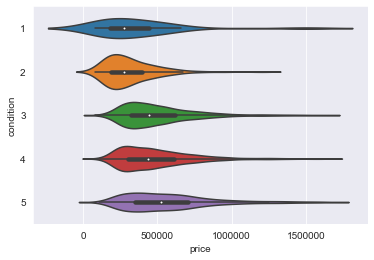

In [7]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

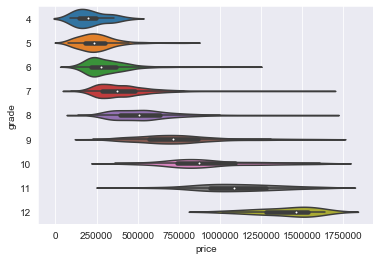

In [8]:
sns.violinplot(x='price', y='grade', data=df, orient='h')
plt.show()

In [9]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

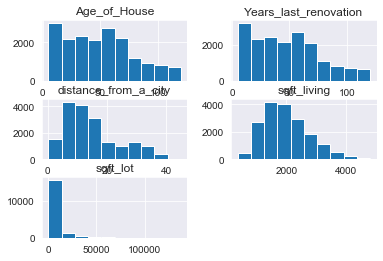

In [10]:
df[features].hist();

In [11]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [12]:
for feat in tobox:
    df[feat],l = scs.boxcox(df[feat])


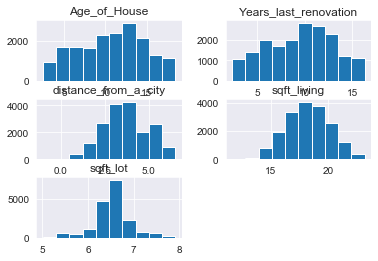

In [13]:
df[features].hist();

In [14]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [15]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']


In [16]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [17]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [18]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [19]:
df['grade4'] = df.grade.apply(lambda x: 1 if x ==4 else 0)
df['grade5'] = df.grade.apply(lambda x: 1 if x ==5 else 0)
df['grade6'] = df.grade.apply(lambda x: 1 if x ==6 else 0)
df['grade7'] = df.grade.apply(lambda x: 1 if x ==7 else 0)
df['grade8'] = df.grade.apply(lambda x: 1 if x ==8 else 0)
df['grade9'] = df.grade.apply(lambda x: 1 if x ==9 else 0)
df['grade10'] = df.grade.apply(lambda x: 1 if x ==10 else 0)
df['grade11'] = df.grade.apply(lambda x: 1 if x ==11 else 0)


In [20]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [21]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation','basement',
           'grade4', 'grade5', 'grade6', 'grade7', 'grade8', 'grade9',
       'grade10', 'grade11']
outcome = ['price']

In [22]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [23]:
X = df[x_cols]
y = df['price']

In [24]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          1.899e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:20:27   Log-Likelihood:                     -2.4138e+05
No. Observations:               18208   AIC:                                  4.828e+05
Df Residuals:                   18193   BIC:                                  4.829e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               -1.84e+04   1377.654    -13.359      0.000   -2.11e+04   -1.57e+04
bathrooms              2.185e+04   1803.064     12.121      0.000    1.83e+04    2.54e+04
sqft_living            1.039e+05   2194.334     47.350      0.000    9.96e+04    1.08e+05
sqft_lot               2.348e+04   1323.393     17.746      0.000    2.09e+04    2.61e+04
distance_from_a_city  -1.243e+05   1254.222    -99.124      0.000   -1.27e+05   -1.22e+05
Years_last_renovation  2.222e+04   1513.126     14.686      0.000    1.93e+04    2.52e+04
basement              -1.387e+04   2373.738     -5.844      0.000   -1.85e+04   -9220.202
grade4                 4.753e+05    2.8e+04     16.971      0.000     4.2e+05     5.3e+05
grade5                 4.409e+05   1.03e+04     42.806      0.000    4.21e+05    4.61e+05
grade6                 4.246e+05   4088.713    103.844      0.000    4.17e+05    4.33e+05
grade7                 4.564e+05   2076.812    219.782      0.000    4.52e+05    4.61e+05
grade8                 5.148e+05   2212.458    232.663      0.000     5.1e+05    5.19e+05
grade9                 6.359e+05   3503.963    181.471      0.000    6.29e+05    6.43e+05
grade10                7.377e+05   5546.791    132.988      0.000    7.27e+05    7.49e+05
grade11                8.583e+05   1.05e+04     81.815      0.000    8.38e+05    8.79e+05
==============================================================================
Omnibus:                     6101.153   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45125.845
Skew:                           1.414   Prob(JB):                         0.00
Kurtosis:                      10.175   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 15
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.84e+04,1377.654,-13.359,0.0,-2.11e+04,-1.57e+04
bathrooms,2.185e+04,1803.064,12.121,0.0,1.83e+04,2.54e+04
sqft_living,1.039e+05,2194.334,47.350,0.0,9.96e+04,1.08e+05
sqft_lot,2.348e+04,1323.393,17.746,0.0,2.09e+04,2.61e+04
distance_from_a_city,-1.243e+05,1254.222,-99.124,0.0,-1.27e+05,-1.22e+05


In [26]:
X = df[x_cols]
y= df['price']

In [27]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          1.899e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:20:28   Log-Likelihood:                     -2.4138e+05
No. Observations:               18208   AIC:                                  4.828e+05
Df Residuals:                   18193   BIC:                                  4.829e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               -1.84e+04   1377.654    -13.359      0.000   -2.11e+04   -1.57e+04
bathrooms              2.185e+04   1803.064     12.121      0.000    1.83e+04    2.54e+04
sqft_living            1.039e+05   2194.334     47.350      0.000    9.96e+04    1.08e+05
sqft_lot               2.348e+04   1323.393     17.746      0.000    2.09e+04    2.61e+04
distance_from_a_city  -1.243e+05   1254.222    -99.124      0.000   -1.27e+05   -1.22e+05
Years_last_renovation  2.222e+04   1513.126     14.686      0.000    1.93e+04    2.52e+04
basement              -1.387e+04   2373.738     -5.844      0.000   -1.85e+04   -9220.202
grade4                 4.753e+05    2.8e+04     16.971      0.000     4.2e+05     5.3e+05
grade5                 4.409e+05   1.03e+04     42.806      0.000    4.21e+05    4.61e+05
grade6                 4.246e+05   4088.713    103.844      0.000    4.17e+05    4.33e+05
grade7                 4.564e+05   2076.812    219.782      0.000    4.52e+05    4.61e+05
grade8                 5.148e+05   2212.458    232.663      0.000     5.1e+05    5.19e+05
grade9                 6.359e+05   3503.963    181.471      0.000    6.29e+05    6.43e+05
grade10                7.377e+05   5546.791    132.988      0.000    7.27e+05    7.49e+05
grade11                8.583e+05   1.05e+04     81.815      0.000    8.38e+05    8.79e+05
==============================================================================
Omnibus:                     6101.153   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45125.845
Skew:                           1.414   Prob(JB):                         0.00
Kurtosis:                      10.175   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.8030801554973592),
 ('bathrooms', 3.0885666167619497),
 ('sqft_living', 4.574462347449459),
 ('sqft_lot', 1.6638415475242025),
 ('distance_from_a_city', 1.4944573591285157),
 ('Years_last_renovation', 2.175126605844943),
 ('basement', 2.0457204341386106),
 ('grade4', 1.0231836671702645),
 ('grade5', 1.1016375782617849),
 ('grade6', 1.5343885176569705),
 ('grade7', 1.7489108698037896),
 ('grade8', 1.3439931889149406),
 ('grade9', 1.387630355274226),
 ('grade10', 1.305179631118152),
 ('grade11', 1.1139682721594295)]

In [29]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

15 15


In [30]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          1.899e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:20:30   Log-Likelihood:                     -2.4138e+05
No. Observations:               18208   AIC:                                  4.828e+05
Df Residuals:                   18193   BIC:                                  4.829e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               -1.84e+04   1377.654    -13.359      0.000   -2.11e+04   -1.57e+04
bathrooms              2.185e+04   1803.064     12.121      0.000    1.83e+04    2.54e+04
sqft_living            1.039e+05   2194.334     47.350      0.000    9.96e+04    1.08e+05
sqft_lot               2.348e+04   1323.393     17.746      0.000    2.09e+04    2.61e+04
distance_from_a_city  -1.243e+05   1254.222    -99.124      0.000   -1.27e+05   -1.22e+05
Years_last_renovation  2.222e+04   1513.126     14.686      0.000    1.93e+04    2.52e+04
basement              -1.387e+04   2373.738     -5.844      0.000   -1.85e+04   -9220.202
grade4                 4.753e+05    2.8e+04     16.971      0.000     4.2e+05     5.3e+05
grade5                 4.409e+05   1.03e+04     42.806      0.000    4.21e+05    4.61e+05
grade6                 4.246e+05   4088.713    103.844      0.000    4.17e+05    4.33e+05
grade7                 4.564e+05   2076.812    219.782      0.000    4.52e+05    4.61e+05
grade8                 5.148e+05   2212.458    232.663      0.000     5.1e+05    5.19e+05
grade9                 6.359e+05   3503.963    181.471      0.000    6.29e+05    6.43e+05
grade10                7.377e+05   5546.791    132.988      0.000    7.27e+05    7.49e+05
grade11                8.583e+05   1.05e+04     81.815      0.000    8.38e+05    8.79e+05
==============================================================================
Omnibus:                     6101.153   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45125.845
Skew:                           1.414   Prob(JB):                         0.00
Kurtosis:                      10.175   Cond. No.                         44.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

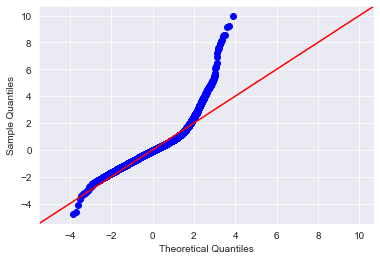

In [31]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


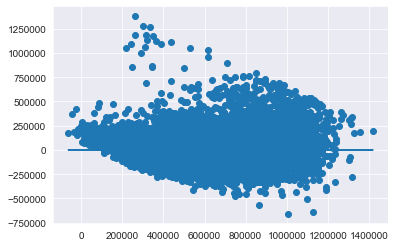

In [32]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

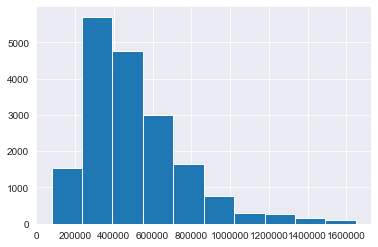

In [33]:
df.price.hist()

In [34]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 675960.0
0.81 percentile: 690000.0
0.82 percentile: 700000.0
0.83 percentile: 716000.0
0.84 percentile: 730000.0
0.85 percentile: 746474.9999999995
0.86 percentile: 760000.0
0.87 percentile: 775000.0
0.88 percentile: 795000.0
0.89 percentile: 810229.9999999997
0.9 percentile: 834000.0
0.91 percentile: 855000.0
0.92 percentile: 880000.0
0.93 percentile: 911559.0000000019
0.94 percentile: 950000.0
0.95 percentile: 991629.9999999995
0.96 percentile: 1060000.0
0.97 percentile: 1160000.0
0.98 percentile: 1260000.0
0.99 percentile: 1400000.0


In [35]:
orig_tot = len(df)
df = df[df.price < 1000000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.04822056239015817


In [36]:
X = df[x_cols]
y = df['price']

In [37]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2951.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:20:32   Log-Likelihood:            -2.2501e+05
No. Observations:               17330   AIC:                         4.501e+05
Df Residuals:                   17315   BIC:                         4.502e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.412e+04   1084.337    -13.021      0.000   -1.62e+04    -1.2e+04
bathrooms              1.105e+04   1425.233      7.750      0.000    8252.306    1.38e+04
sqft_living            8.751e+04   1723.868     50.762      0.000    8.41e+04    9.09e+04
sqft_lot               1.938e+04   1037.967     18.676      0.000    1.74e+04    2.14e+04
distance_from_a_city   -1.06e+05    995.638   -106.485      0.000   -1.08e+05   -1.04e+05
Years_last_renovation  1.555e+04   1211.291     12.838      0.000    1.32e+04    1.79e+04
basement              -1.891e+04   1857.346    -10.181      0.000   -2.25e+04   -1.53e+04
grade4                 4.293e+05   2.13e+04     20.122      0.000    3.87e+05    4.71e+05
grade5                 4.073e+05   7865.670     51.787      0.000    3.92e+05    4.23e+05
grade6                 4.013e+05   3152.292    127.314      0.000    3.95e+05    4.08e+05
grade7                 4.478e+05   1604.915    279.047      0.000    4.45e+05    4.51e+05
grade8                 5.091e+05   1717.380    296.450      0.000    5.06e+05    5.12e+05
grade9                 5.994e+05   2826.104    212.100      0.000    5.94e+05    6.05e+05
grade10                6.571e+05   4863.813    135.101      0.000    6.48e+05    6.67e+05
grade11                 7.13e+05   1.29e+04     55.291      0.000    6.88e+05    7.38e+05
==============================================================================
Omnibus:                      552.296   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.085
Skew:                           0.320   Prob(JB):                    4.15e-180
Kurtosis:                       3.857   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 15
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.412e+04,1084.337,-13.021,0.0,-1.62e+04,-1.2e+04
bathrooms,1.105e+04,1425.233,7.750,0.0,8252.306,1.38e+04
sqft_living,8.751e+04,1723.868,50.762,0.0,8.41e+04,9.09e+04
sqft_lot,1.938e+04,1037.967,18.676,0.0,1.74e+04,2.14e+04
distance_from_a_city,-1.06e+05,995.638,-106.485,0.0,-1.08e+05,-1.04e+05


In [39]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2951.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:20:34   Log-Likelihood:            -2.2501e+05
No. Observations:               17330   AIC:                         4.501e+05
Df Residuals:                   17315   BIC:                         4.502e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.412e+04   1084.337    -13.021      0.000   -1.62e+04    -1.2e+04
bathrooms              1.105e+04   1425.233      7.750      0.000    8252.306    1.38e+04
sqft_living            8.751e+04   1723.868     50.762      0.000    8.41e+04    9.09e+04
sqft_lot               1.938e+04   1037.967     18.676      0.000    1.74e+04    2.14e+04
distance_from_a_city   -1.06e+05    995.638   -106.485      0.000   -1.08e+05   -1.04e+05
Years_last_renovation  1.555e+04   1211.291     12.838      0.000    1.32e+04    1.79e+04
basement              -1.891e+04   1857.346    -10.181      0.000   -2.25e+04   -1.53e+04
grade4                 4.293e+05   2.13e+04     20.122      0.000    3.87e+05    4.71e+05
grade5                 4.073e+05   7865.670     51.787      0.000    3.92e+05    4.23e+05
grade6                 4.013e+05   3152.292    127.314      0.000    3.95e+05    4.08e+05
grade7                 4.478e+05   1604.915    279.047      0.000    4.45e+05    4.51e+05
grade8                 5.091e+05   1717.380    296.450      0.000    5.06e+05    5.12e+05
grade9                 5.994e+05   2826.104    212.100      0.000    5.94e+05    6.05e+05
grade10                6.571e+05   4863.813    135.101      0.000    6.48e+05    6.67e+05
grade11                 7.13e+05   1.29e+04     55.291      0.000    6.88e+05    7.38e+05
==============================================================================
Omnibus:                      552.296   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.085
Skew:                           0.320   Prob(JB):                    4.15e-180
Kurtosis:                       3.857   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.8004119419286313),
 ('bathrooms', 2.9716183811220884),
 ('sqft_living', 4.261788828201053),
 ('sqft_lot', 1.6839404990642222),
 ('distance_from_a_city', 1.50146480267356),
 ('Years_last_renovation', 2.260153163549276),
 ('basement', 1.2572661328395622),
 ('grade4', 1.0245813406903925),
 ('grade5', 1.1085828446218453),
 ('grade6', 1.570267190238008),
 ('grade7', 1.7967247009838376),
 ('grade8', 1.3559923706413237),
 ('grade9', 1.3397775916037447),
 ('grade10', 1.205629612328651),
 ('grade11', 1.0331467513258026)]

In [41]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

15 15


In [42]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2951.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:20:36   Log-Likelihood:            -2.2501e+05
No. Observations:               17330   AIC:                         4.501e+05
Df Residuals:                   17315   BIC:                         4.502e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.412e+04   1084.337    -13.021      0.000   -1.62e+04    -1.2e+04
bathrooms              1.105e+04   1425.233      7.750      0.000    8252.306    1.38e+04
sqft_living            8.751e+04   1723.868     50.762      0.000    8.41e+04    9.09e+04
sqft_lot               1.938e+04   1037.967     18.676      0.000    1.74e+04    2.14e+04
distance_from_a_city   -1.06e+05    995.638   -106.485      0.000   -1.08e+05   -1.04e+05
Years_last_renovation  1.555e+04   1211.291     12.838      0.000    1.32e+04    1.79e+04
basement              -1.891e+04   1857.346    -10.181      0.000   -2.25e+04   -1.53e+04
grade4                 4.293e+05   2.13e+04     20.122      0.000    3.87e+05    4.71e+05
grade5                 4.073e+05   7865.670     51.787      0.000    3.92e+05    4.23e+05
grade6                 4.013e+05   3152.292    127.314      0.000    3.95e+05    4.08e+05
grade7                 4.478e+05   1604.915    279.047      0.000    4.45e+05    4.51e+05
grade8                 5.091e+05   1717.380    296.450      0.000    5.06e+05    5.12e+05
grade9                 5.994e+05   2826.104    212.100      0.000    5.94e+05    6.05e+05
grade10                6.571e+05   4863.813    135.101      0.000    6.48e+05    6.67e+05
grade11                 7.13e+05   1.29e+04     55.291      0.000    6.88e+05    7.38e+05
==============================================================================
Omnibus:                      552.296   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              826.085
Skew:                           0.320   Prob(JB):                    4.15e-180
Kurtosis:                       3.857   Cond. No.                         42.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

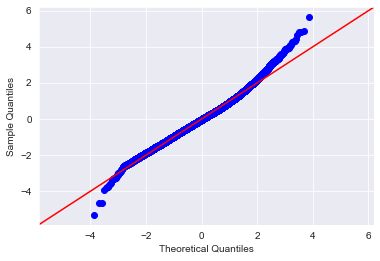

In [43]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


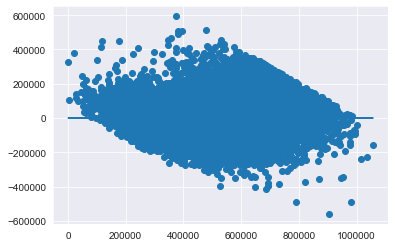

In [44]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [45]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [46]:
residuals = model.resid

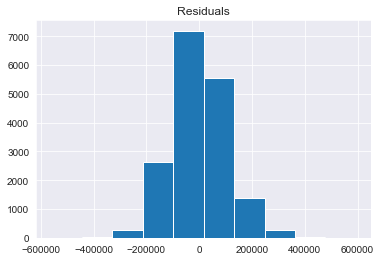

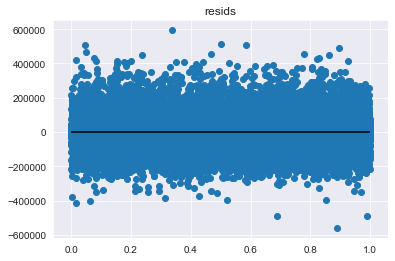

In [47]:
plot_residuals(residuals)

In [48]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [49]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [50]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.7021151025169426, 0.7011619414711397, 0.7015629346588901)

In [51]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-81792.3998205176, -81775.43124729113, -81686.38752074352)

In [52]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7040360945874184

In [53]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmae_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_absolute_error'))
    cvmae_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_absolute_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmae_5}")
    print(f"cv10  MSE score = {cvmae_10}")

    return ols

In [60]:
make_ols_sklearn(X, y)

train R2 score = 0.7055221654552697
test R2 score = 0.7007332251749611
cv5 R2 score = 0.7021151025169426
cv10 R2 score = 0.7011619414711397
cv5 MSE score = -81792.39982051762
cv10  MSE score = -81775.43124729113


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [55]:
X_shuff, y_shuff = shuffle(X, y)

In [56]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.703709977650845

In [57]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7038995631403206

In [58]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7040704157393366

In [61]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2951.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:21:10   Log-Likelihood:            -2.2501e+05
No. Observations:               17330   AIC:                         4.501e+05
Df Residuals:                   17315   BIC:                         4.502e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.412e+

In [62]:
model.params

bedrooms                 -14119.459238
bathrooms                 11045.907405
sqft_living               87506.289672
sqft_lot                  19384.890200
distance_from_a_city    -106020.089433
Years_last_renovation     15550.154625
basement                 -18908.846863
grade4                   429291.231075
grade5                   407340.467986
grade6                   401331.966922
grade7                   447846.052669
grade8                   509117.908697
grade9                   599417.339206
grade10                  657105.384453
grade11                  712994.558987
dtype: float64

In [63]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

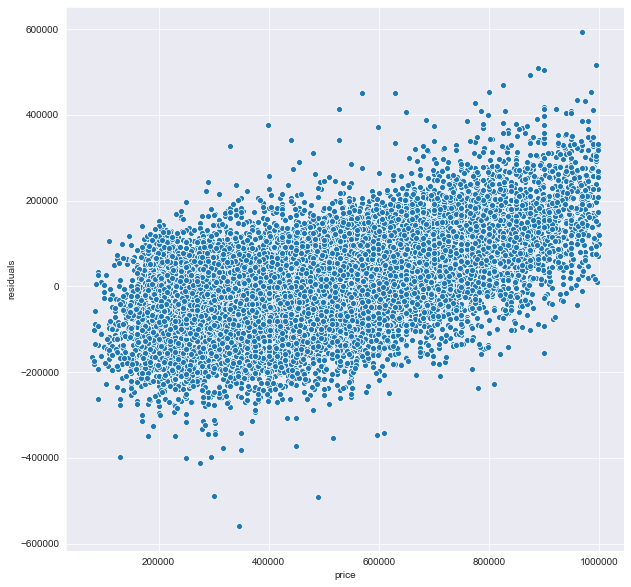

In [64]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [65]:
ols = LinearRegression(fit_intercept=False,normalize=False)

In [66]:
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [67]:
df['price'].mean()

465923.81477207155

In [68]:
sample = df.loc[(df['price'] > 400000.00) & (df['price']<500000.00)]

In [69]:
sample [:len(sample)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,distance_from_a_city,distance_from_airport,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11
9,2014-05-27,468000.0,-1.553882,-1.515216,-1.157514,-0.245995,1.0,0.0,0.0,4,...,-0.439414,27.396803,0,0,0,1,0,0,0,0
15,2014-05-29,485000.0,0.771896,-1.515216,-0.400924,-0.681422,1.5,0.0,0.0,4,...,-1.009018,24.781593,0,0,0,1,0,0,0,0
25,2014-06-24,438000.0,-0.390993,-0.448849,-0.525014,-0.166887,1.0,0.0,0.0,3,...,-0.399002,27.943406,0,0,0,1,0,0,0,0
41,2014-07-18,488000.0,-0.390993,0.617519,1.376989,0.779727,2.0,0.0,0.0,3,...,0.899056,41.339254,0,0,0,0,1,0,0,0
44,2015-04-28,450000.0,-0.390993,-0.448849,-0.986191,-0.253983,1.0,0.0,0.0,4,...,-0.643112,26.231574,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19205,2015-04-16,475000.0,-0.390993,0.262063,-1.099271,-2.451590,3.0,0.0,0.0,3,...,-1.255970,23.644023,0,0,0,0,1,0,0,0
19212,2015-04-07,467000.0,-0.390993,0.617519,-0.679282,-2.477257,3.0,0.0,0.0,3,...,-0.406132,28.114025,0,0,0,0,1,0,0,0
19213,2015-01-26,429000.0,-0.390993,-0.093393,-0.572884,-2.544282,3.0,0.0,0.0,3,...,-1.182880,14.078488,0,0,0,0,1,0,0,0
19216,2015-02-19,475000.0,-0.390993,0.617519,-0.877333,-2.342320,2.0,0.0,0.0,3,...,-0.976405,16.906717,0,0,0,0,1,0,0,0


In [70]:
sample = sample[x_cols]

In [71]:
sample

,bedrooms,bathrooms,sqft_living,sqft_lot,distance_from_a_city,Years_last_renovation,basement,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11
9,-1.553882,-1.515216,-1.157514,-0.245995,-0.439414,1.040536,1,0,0,0,1,0,0,0,0
15,0.771896,-1.515216,-0.400924,-0.681422,-1.009018,1.630965,0,0,0,0,1,0,0,0,0
25,-0.390993,-0.448849,-0.525014,-0.166887,-0.399002,0.889070,1,0,0,0,1,0,0,0,0
41,-0.390993,0.617519,1.376989,0.779727,0.899056,-1.099827,0,0,0,0,0,1,0,0,0
44,-0.390993,-0.448849,-0.986191,-0.253983,-0.643112,0.757336,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19205,-0.390993,0.262063,-1.099271,-2.451590,-1.255970,-1.418882,0,0,0,0,0,1,0,0,0
19212,-0.390993,0.617519,-0.679282,-2.477257,-0.406132,-1.418882,0,0,0,0,0,1,0,0,0
19213,-0.390993,-0.093393,-0.572884,-2.544282,-1.182880,-1.925720,0,0,0,0,0,1,0,0,0
19216,-0.390993,0.617519,-0.877333,-2.342320,-0.976405,-1.418882,1,0,0,0,0,1,0,0,0


In [72]:
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'distance_from_a_city',
 'Years_last_renovation',
 'basement',
 'grade4',
 'grade5',
 'grade6',
 'grade7',
 'grade8',
 'grade9',
 'grade10',
 'grade11']

In [73]:
def predict_price(x_sample):
    cols =['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'distance_from_a_city',
 'Years_last_renovation',
 'basement',
 'grade4',
 'grade5',
 'grade6',
 'grade7',
 'grade8',
 'grade9',
 'grade10',
 'grade11']
    target = 'price'
    x_sample_final = x_sample[cols]
    return ols.predict(x_sample_final)[0]

In [74]:
predict_list = []
for i in range(len(sample)):
    predict = ols.predict(sample[i:i+1])
    predict_list.extend(predict)

In [75]:
df['price'].mean()

465923.81477207155

In [76]:
np.mean(predict_list)

462656.6528328135

For House prices in a sample of 3100 houses between USD 400,000 and USD 500,000. The model predcited USD 3000 away from the average price 

In [86]:
sample2 = df.loc[df['price']<800000.00]

In [87]:
np.mean(sample2['price'])

433455.2134593855

In [88]:
len(sample2)

16078

In [89]:
sample2 = sample2[x_cols]

In [90]:
predict_list2 = []
for i in range(len(sample2)):
    predict = ols.predict(sample2[i:i+1])
    predict_list2.extend(predict)

In [91]:
np.mean(predict_list2)

444824.89235066884

For a Sample of 16078 houses, the average prediction ws 10K off the average house price for sample